In [9]:
import pandas as pd
import altair as alt

In [59]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [15]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [16]:
df = pd.read_csv("./input/war_daily_bat.txt")

In [55]:
qualified_df = df[(df.age < 43) & (df.age > 18)]
qualified_df = qualified_df[~pd.isnull(qualified_df.age)]
qualified_df = qualified_df[(qualified_df.PA > 350) | (qualified_df.name_common == 'Mike Trout')]

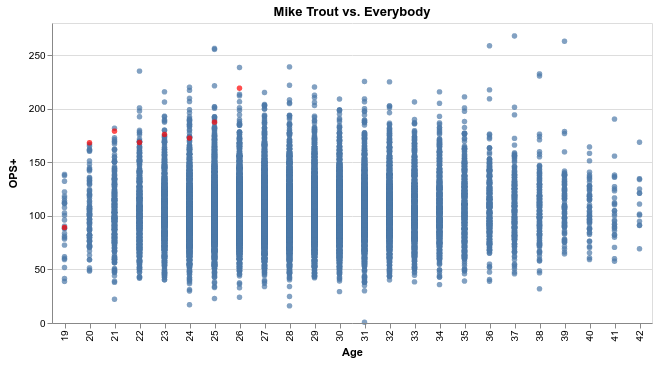

In [60]:
base = alt.Chart(qualified_df, title="Mike Trout vs. Everybody").properties(width=600, height=300).encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age")),
    y=alt.Y("OPS_plus:Q", axis=alt.Axis(title="OPS+")),
    tooltip=["name_common", "OPS_plus"]
)

field = base.mark_circle().transform_filter(alt.datum.name_common != 'Mike Trout')
trout = base.mark_circle(color="red").transform_filter(alt.datum.name_common == 'Mike Trout')

field + trout